In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('AAPL-Final.csv')
df.head()

,Date,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [3]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [4]:
df['Close'].dtypes

dtype('float64')

In [5]:
df.dtypes

Open         float64
High         float64
Low          float64
eps          float64
pe           float64
InRate       float64
InfRate      float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df["Close"].head()

Date
1/3/2000    0.999442
1/4/2000    0.915179
1/5/2000    0.928571
1/6/2000    0.848214
1/7/2000    0.888393
Name: Close, dtype: float64

In [7]:
# df["Close"] = df["Close"].str.replace(",","")
#  = df["Close"].apply(lambda x: float(x))
# df["Close"]=df["Close"].apply(pd.to_numeric)

In [8]:
df["Close"] = df["Close"].astype(str).str.replace(",","")
close = df["Close"].apply(lambda x: float(x))
df["Close"]=df["Close"].apply(pd.to_numeric)

In [9]:
df["Open"] = df["Open"].astype(str).str.replace(",","")
open = df["Close"].apply(lambda x: float(x))

In [10]:
df["High"] = df["High"].astype(str).str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [11]:
df["Low"] = df["Low"].astype(str).str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [12]:
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
adjclose = df["Adj Close"].apply(lambda x: float(x))

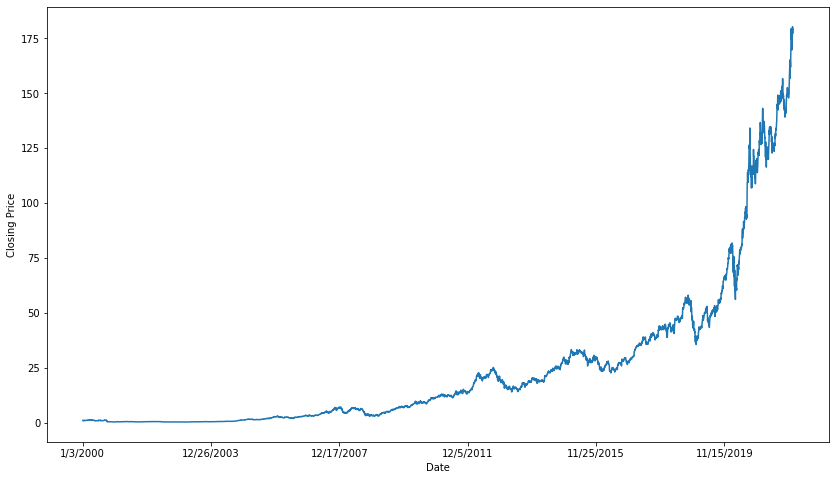

In [13]:
df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

**Data Pre-processing**

In [14]:
df.isna().sum() 

Open         0
High         0
Low          0
eps          0
pe           0
InRate       0
InfRate      0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df["Close"].value_counts()

0.267857      6
0.348214      6
0.265179      5
0.262500      4
0.256429      4
             ..
3.478571      1
3.638929      1
3.498214      1
3.717143      1
177.570007    1
Name: Close, Length: 5057, dtype: int64

In [16]:
df.value_counts()

Open        High        Low         eps       pe         InRate    InfRate   Close       Adj Close   Volume    
0.231964    0.244107    0.230714    0.520628  17.162533  2.306215  2.291470  0.236429    0.201871    1016176000    1
3.285357    3.357143    3.273214    0.861585  13.736580  1.787913  2.111005  3.352500    2.862472    686896000     1
3.303929    3.327143    3.196429    0.837267  13.954909  1.687106  2.330000  3.197857    2.730433    1074836000    1
3.301071    3.33        3.214643    0.986667  12.693451  1.592028  2.053108  3.218571    2.748118    1178976400    1
3.293214    3.31        3.252143    0.838221  13.946249  1.824093  2.122413  3.273571    2.795079    870486400     1
                                                                                                                  ..
128.960007  129.100006  126.120003  1.561417  10.489156  0.572979  1.959141  126.660004  125.365196  192541500     1
128.949997  130.389999  128.520004  1.567962  10.558083  0.557236  1.

In [17]:
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.90346,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [18]:
df.drop("Volume", axis=1, inplace=True)

In [19]:
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close
Date,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355
1/4/2000,0.966518,0.987723,0.90346,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538


In [20]:
df.isna().sum()

Open         0
High         0
Low          0
eps          0
pe           0
InRate       0
InfRate      0
Close        0
Adj Close    0
dtype: int64

**Feature Selection**

In [21]:
df.tail()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close
Date,,,,,,,,,
12/27/2021,177.089996,180.419998,177.070007,1.582562,10.786384,0.520334,1.977604,180.330002,179.586868
12/28/2021,180.160004,181.330002,178.529999,1.582636,10.787788,0.520138,1.977684,179.289993,178.551132
12/29/2021,179.330002,180.630005,178.139999,1.582711,10.789193,0.519943,1.977764,179.380005,178.640778
12/30/2021,179.470001,180.570007,178.089996,1.582785,10.790599,0.519747,1.977845,178.199997,177.465637
12/31/2021,178.089996,179.229996,177.259995,1.582859,10.792005,0.519552,1.977925,177.570007,176.838242


In [39]:
x = df.iloc[:, 0:9].values



In [40]:
x

array([['0.936384', '1.004464', '0.907924', ..., 1.76, 0.999442,
        '0.853355'],
       ['0.966518', '0.987723', '0.90346', ..., 2.48827564, 0.915179,
        '0.781409'],
       ['0.926339', '0.987165', '0.919643', ..., 2.488010875, 0.928571,
        '0.792844'],
       ...,
       ['179.330002', '180.630005', '178.139999', ..., 1.97776447,
        179.380005, '178.640778'],
       ['179.470001', '180.570007', '178.089996', ..., 1.977844731,
        178.199997, '177.465637'],
       ['178.089996', '179.229996', '177.259995', ..., 1.977925055,
        177.570007, '176.838242']], dtype=object)

In [41]:
y = df.iloc[:, 8].values

In [42]:
y 

array(['0.853355', '0.781409', '0.792844', ..., '178.640778',
       '177.465637', '176.838242'], dtype=object)

x is holding values for the open, high, low, close, Adj Close columns and y is holding the value of Adj Close columns

Divide the dataset into train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

In [44]:
#Scaling the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Hyperparameter Tuning
For a random forest regression model, we are considering the follwing parameters:

n_estimators — number of trees in the forest <br>
max_depth — maximum depth in a tree <br>
min_samples_split — minimum number of data points before the sample is split <br>
min_samples_leaf — minimum number of leaf nodes that are required to be sampled <br>
bootstrap — sampling for data points, true or false <br>
random_state — generated random numbers for the random forest. <br>

In [28]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Apply model and Predict

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=30, min_samples_split=2, min_samples_leaf=1, max_depth=12, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [46]:
print(predict)

[  0.85550561   6.01227568   0.33324011 ...   0.26047703 135.69323969
   0.3547208 ]


In [47]:
print(predict.shape)

(1108,)


In [48]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 5))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 5))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 5))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 5))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
             

Mean Absolute Error: 0.03662
Mean Squared Error: 0.02138
Root Mean Squared Error: 0.14621
(R^2) Score: 0.99998
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.


In [49]:
df.index

Index(['1/3/2000', '1/4/2000', '1/5/2000', '1/6/2000', '1/7/2000', '1/10/2000',
       '1/11/2000', '1/12/2000', '1/13/2000', '1/14/2000',
       ...
       '12/17/2021', '12/20/2021', '12/21/2021', '12/22/2021', '12/23/2021',
       '12/27/2021', '12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021'],
      dtype='object', name='Date', length=5536)

In [50]:
df.index[0]

'1/3/2000'

In [51]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))

In [52]:
predictions

,Predictions
2021-12-31,0.855506
2022-01-01,6.012276
2022-01-02,0.333240
2022-01-03,26.497473
2022-01-04,41.957841
...,...
2025-01-07,0.545189
2025-01-08,30.140922
2025-01-09,0.260477
2025-01-10,135.693240


In [53]:
tendays_df_pred = pd.DataFrame(predictions[:10])

In [54]:
tendays_df_pred 

,Predictions
2021-12-31,0.855506
2022-01-01,6.012276
2022-01-02,0.333240
2022-01-03,26.497473
2022-01-04,41.957841
2022-01-05,0.326636
2022-01-06,1.113560
2022-01-07,118.958555
2022-01-08,0.271130
2022-01-09,24.211058


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


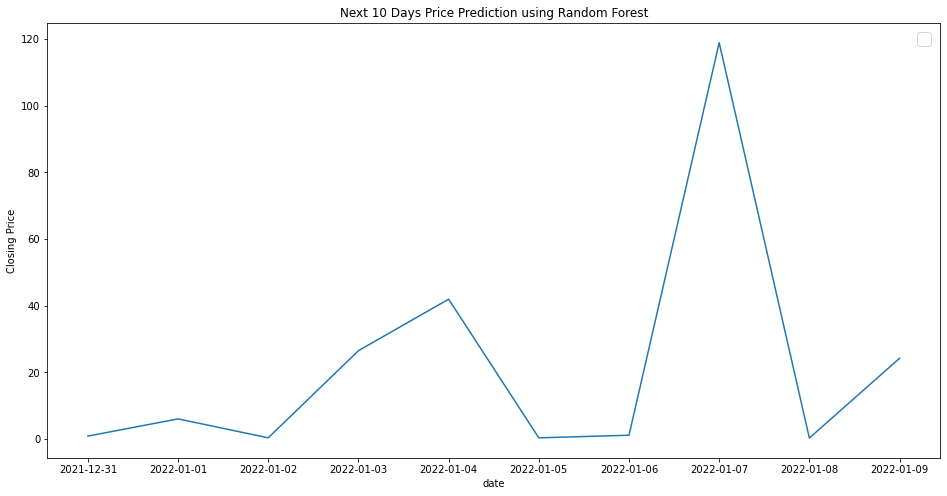

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# predictions[len(tendays_df_pred)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.figure(figsize = (16,8))
plt.title('Next 10 Days Price Prediction using Random Forest')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(fontsize=18)
plt.plot(tendays_df_pred)
plt.show()
